([], <a list of 0 Text yticklabel objects>)

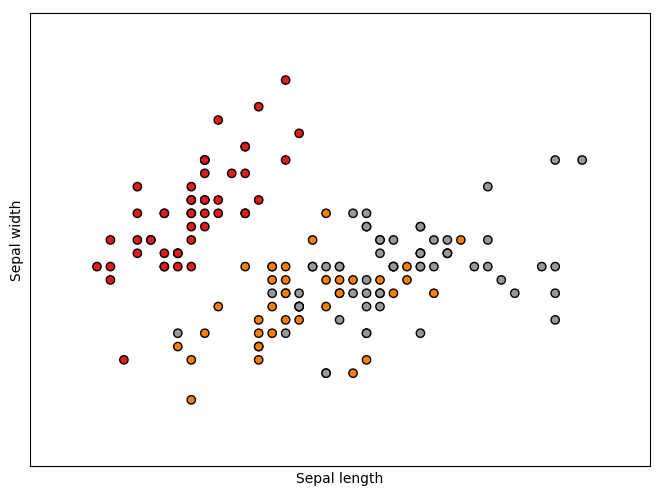

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import seaborn as sns

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max);
plt.ylim(y_min, y_max);
plt.xticks(());
plt.yticks(());

In [ ]:
iris_df = sns.load_dataset("iris")
sns.pairplot(iris_df, hue = 'species');

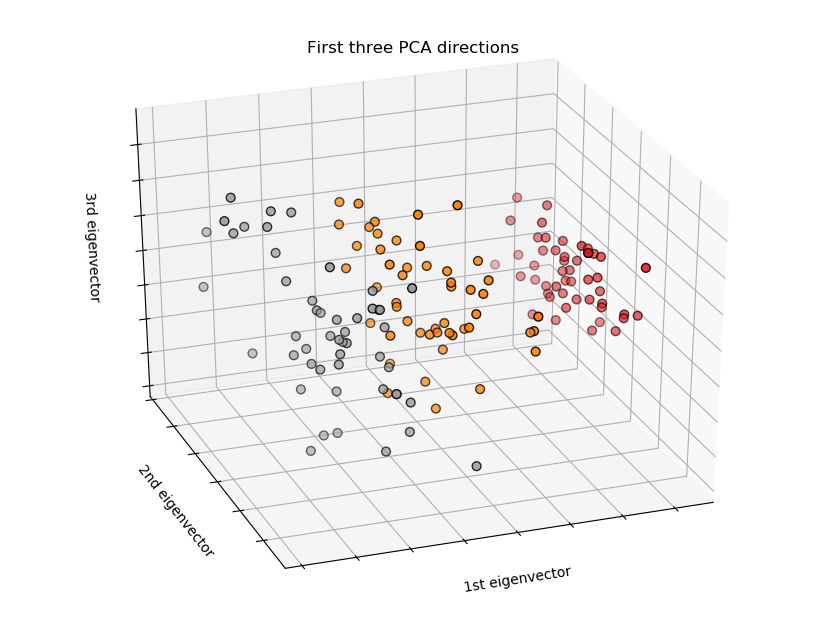

In [14]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

## Classificazione (supervised)

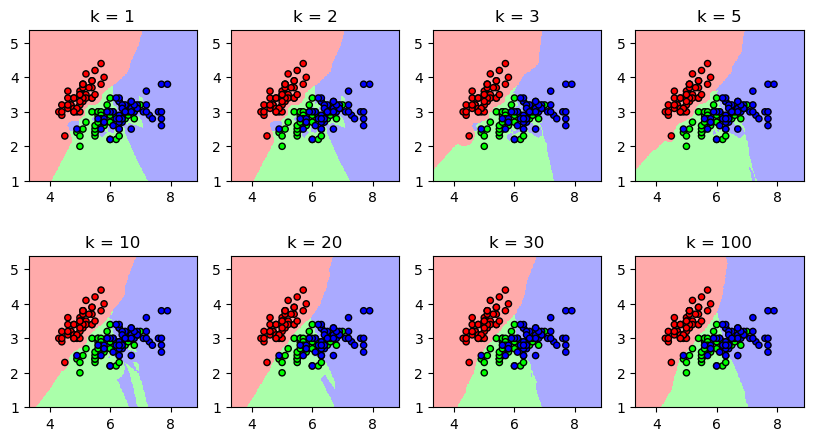

In [2]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import numpy as np

n_neighbors = [1, 2, 3, 5, 10, 20, 30, 100]
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

fig, ax = plt.subplots(2,4,figsize=(10,5))

#for weights in ['uniform', 'distance']:
for j, ne in enumerate(n_neighbors):
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(ne, weights='distance')
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    row = j // 4
    col = j % 4

    ax[row, col].pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    ax[row, col].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    ax[row, col].set_title("k = %i"
              % (ne))

plt.subplots_adjust(hspace=0.5)
plt.show()

In [7]:
from sklearn.model_selection import validation_curve
knn_clf = neighbors.KNeighborsClassifier()
param_range = [1, 2, 3, 5, 10, 20, 30, 50, 60, 100]
train_scores, test_scores = validation_curve(
    knn_clf, X, y, param_name="n_neighbors", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)

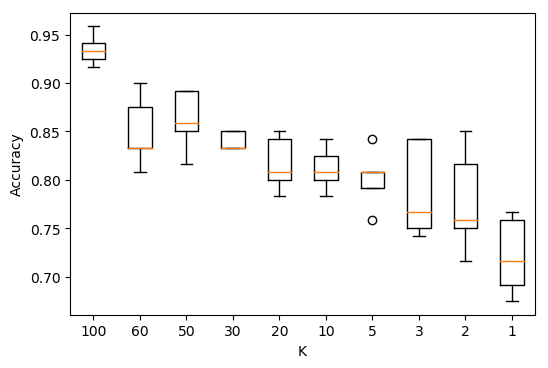

In [12]:
### Score nel training set
plt.boxplot(train_scores.T);
plt.xticks(range(10,0,-1), param_range);
plt.xlabel('K');
plt.ylabel('Accuracy');

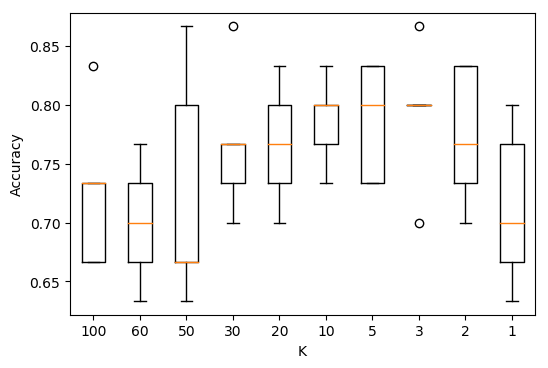

In [13]:
### Score nel val set
plt.boxplot(test_scores.T);
plt.xticks(range(10,0,-1), param_range);
plt.xlabel('K');
plt.ylabel('Accuracy');

## Over-fitting
I precedenti grafico mostrare ancora il fenomeno dell'overfitting.
Infatti mentre l'accurattezza sul training set aumentare al diminuire di K (aumenta la complessita' del modello), per il validation